# Example 3. Support vector machine (SVM)
---

SVM is the extension of the perceptron which the decision boundary (objective function) is the hyperplane type, i.e. $w^TX=0$. The major feature of SVM is added the certain margin within the decision boundary. The size of margin is decieded by two extra hyperplanes with 

$$ 
\begin{equation}
\begin{split}
w^TX_{pos}&>c \\
w^TX_{neg}&<-c \ ,
\end{split}
\end{equation}
$$ 

where $c$ is the offset non-zero constant from decision boundary, and they are called **positive hyperplane** and **negative hyperplane**, respeactively. Since they are supposed to be parallel to decision boundary, their $w$ are the same as it. Both hyperplanes are obtained by the training data points on those planes, so called **support vectors**. For separating the categories, we look for the maximum of the margin size $d$ between both hyperplanes. In order to get $d$, we have to know the vertical ditance of any point in space $X$ to any point on hyperplane $X'$, which is 

$$
\begin{equation}
d = \hat{w}\cdot(X-X') = \frac{w}{||w||}\cdot(X-X') = \frac{w^T(X-X')}{||w||}\ ,
\end{equation}
$$

where $\hat{w}$ is unit normal-vector of hyperplane, $||w||$ is the nomalization of $w$ with $\sqrt{\sum^m_jw^2_j}$. The normal distance is the projection of the distance $X$ and $X'$ to hyperplance by unit normal-vector. Thus, the normal distance between both hyperplanes, i.e. the decision boundary margin, can be obtained as 

$$
\begin{equation}
d = \frac{w^T(X_{pos}-X_{neg})}{||w||}\ ,
\end{equation}
$$

where $X_{pos}$ and $X_{neg}$ are the any point on positive and negetive hyperplane, respectively. However, according to the correlation from first fomulars, we can derivate 

$$
\begin{equation}
w^T(X_{pos}-X_{neg})>2c\ .
\end{equation}
$$

By replacing this correlation to $d$, we can also obtain

$$
\begin{equation}
d>\frac{2c}{||w||}\ .
\end{equation}
$$

## Import data

In [1]:
from sklearn import datasets
import numpy as np

from plot_decision_regions import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0 )
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 1. Linear SVM with Sklearn

In [5]:
from sklearn.svm import SVC

In [6]:
svm = SVC(kernel='linear', C=1., random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

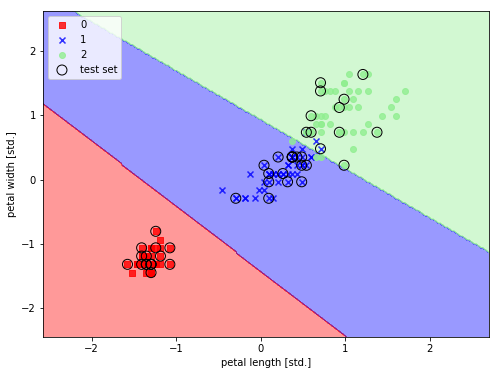

In [7]:
plt.figure(figsize=(8, 6))

X_combined_std = np.vstack( (X_train_std, X_test_std) )
y_combined = np.hstack( (y_train, y_test) )
plot_decision_regions( X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105,150) )
plt.xlabel('petal length [std.]')
plt.ylabel('petal width [std.]')
plt.legend(loc='upper left')
plt.show()

### 1.1 Turning penalty test

In [45]:
C_min = 0.05
C_max = 2.05
N_C = 10
svm_C = []
for i in range(N_C):
    C = (C_max - C_min )/N_C*i + C_min
    svm_C.append(SVC(kernel='linear', C=C, random_state=0))
    svm_C[i].fit(X_train_std, y_train)

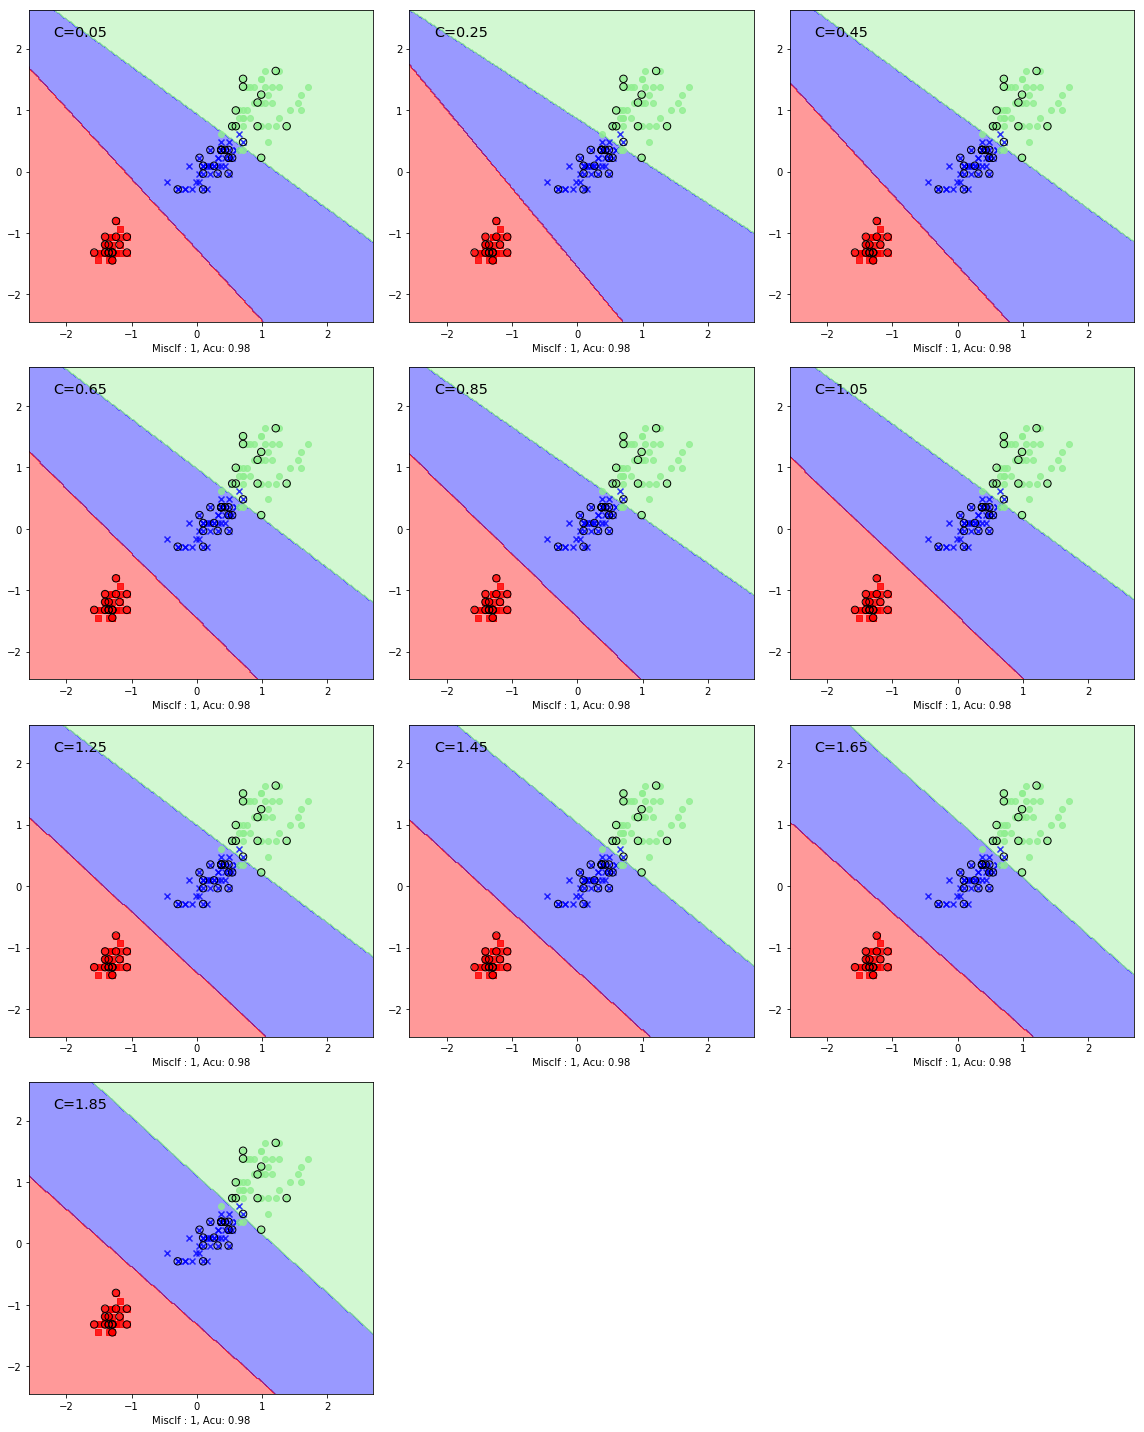

In [46]:
r = int(N_C/3)
fig = plt.figure(figsize=(16, N_C*2))
for i in range(N_C):
    C = (C_max - C_min )/N_C*i + C_min
    fig.add_subplot( r if N_C%3 is 0 else r+1, 3, i+1 )
    plot_decision_regions( X=X_combined_std, y=y_combined, classifier=svm_C[i], test_idx=range(105,150), highlightSize=55 )
    plt.text(-2.2, 2.2, 'C='+str(C), fontsize='x-large')
    y_pred_ = svm_C[i].predict(X_test_std)
    plt.xlabel('Misclf : %d, Acu: %.2f'%( (y_test != y_pred_).sum(), svm_C[i].score(X_test_std, y_test) ) )
plt.tight_layout()
plt.show()